# <font color='red'> Project 1

### Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for thi dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

### Classification task:
- Decide aboute a good evaluation strategy and justify your choice.
- Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding project:
- Post your queries related to project on discussion board on e-learning. There is high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through mail.


# Sanket Pachade



---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.


# Importing the 2 files:


In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('Audit_Risk.csv')
data2= pd.read_csv('trial.csv')


## Checking shape of imported data frames:


In [2]:
print(data.shape)
print(data2.shape)

(776, 27)
(776, 18)



## I shall supress warnings so that the code is more readable


In [3]:
import warnings
warnings.filterwarnings("ignore")


# Now I will check each column for a value that indicates bad/missing value (only looking at columns with less number of unique values)


In [4]:
for col in data:
    if data[col].nunique()<25:
        print(col,data[col].unique())
        
for col in data2:
    if data2[col].nunique()<25:
        print(col,data2[col].unique())

Sector_score [ 3.89  3.41  2.72  2.37  1.99  1.85  2.36  2.34 15.56 17.68 21.61 59.85
 55.57]
Score_A [0.6 0.2 0.4]
Score_B [0.2 0.6 0.4]
numbers [5.  6.  5.5 6.5 9. ]
Score_B.1 [0.2 0.6 0.4]
Risk_C [1.  3.6 2.2 3.9 5.4]
Score_MV [0.2 0.6 0.4]
District_Loss [2 4 6]
PROB [0.2 0.4 0.6]
RiSk_E [0.4 0.8 1.2 2.4 1.6]
History [0 1 2 3 9 5 4]
Prob [0.2 0.4 0.6]
Risk_F [0.  0.4 1.2 1.8 5.4 3.  2.4]
Score [2.4 2.  4.4 3.2 4.2 3.6 4.  2.2 3.  2.6 3.8 3.4 4.8 2.8 5.2 4.6 5. ]
CONTROL_RISK [0.4 1.2 0.8 1.6 2.2 5.8 2.  2.4 3.4 4.8 3.6]
Detection_Risk [0.5]
Risk [1 0]
Sector_score [ 3.89  3.41  2.72  2.37  1.99  1.85  2.36  2.34 15.56 17.68 21.61 59.85
 55.57]
SCORE_A [6 2 4]
SCORE_B [2 6 4]
numbers [5.  6.  5.5 6.5 9. ]
Marks [2 6 4]
MONEY_Marks [2 6 4]
District [2 4 6]
Loss [0 1 2]
LOSS_SCORE [2 4 6]
History [0 1 2 3 9 5 4]
History_score [2 4 6]
Score [2.4 2.  4.4 3.2 4.2 3.6 4.  2.2 3.  2.6 3.8 3.4 4.8 2.8 5.2 4.6 5. ]
Risk [1 0]



# There seem to be no bad value indicators.I will now check for the number of null values in each dataframe:


In [5]:
data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [6]:
data2.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64


## There is only one missing value in each dataframe.(Both are in the Money_Value column of their respective dataframes). Therefore, I shall explore the Money_Value and decide if replacing by mean or median is better(I chose to replace because there is only 1 missing value)


In [7]:
data['Money_Value'].describe()

count    775.000000
mean      14.137631
std       66.606519
min        0.000000
25%        0.000000
50%        0.090000
75%        5.595000
max      935.030000
Name: Money_Value, dtype: float64

In [8]:
data2['Money_Value'].describe()

count    775.000000
mean      14.137631
std       66.606519
min        0.000000
25%        0.000000
50%        0.090000
75%        5.595000
max      935.030000
Name: Money_Value, dtype: float64


## Since there is only 1 missing value and there seem to be large outliers, I have decided to replace with median.


In [9]:
data['Money_Value'].median()
data['Money_Value'].fillna((data['Money_Value'].median()), inplace=True)
data2['Money_Value'].median()
data2['Money_Value'].fillna((data2['Money_Value'].median()), inplace=True)


## I will check if replacing NaN was sucessful


In [10]:
print(data2.isnull().any().any())
print(data.isnull().any().any())

False
False



# I will now check if there are any duplicate rows:


In [11]:
dupli_num=data.duplicated().sum()
dupli_num2=data2.duplicated().sum()
data.drop_duplicates(keep='first', inplace=True)
data2.drop_duplicates(keep='first', inplace=True)
print(dupli_num,dupli_num2)

13 13



## I have removed the duplicates(there are only a few so it's okay to do so and duplicates inflate test and training scores) so that there are can exist a primary key that can uniquely identify the dataframe observations.
## Since there are no longer any null values, I will proceed with finding out what the columns in common between the two dataframes are:


In [12]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 
print(intersection(list(data2.columns),list(data.columns)))
common_cols=intersection(list(data2.columns),list(data.columns))

['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value', 'History', 'Score', 'Risk']



# ['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value', 'History', 'Score', 'Risk'] are the columns in common in between the dataframes.(This is to find a key to merge with).
## I will now look at the data in these columns using head:


In [13]:
print(data[common_cols].head(10))
print(data2[common_cols].head(10))

   Sector_score LOCATION_ID  PARA_A  PARA_B  TOTAL  numbers  Money_Value  \
0          3.89          23    4.18    2.50   6.68      5.0         3.38   
1          3.89           6    0.00    4.83   4.83      5.0         0.94   
2          3.89           6    0.51    0.23   0.74      5.0         0.00   
3          3.89           6    0.00   10.80  10.80      6.0        11.75   
4          3.89           6    0.00    0.08   0.08      5.0         0.00   
5          3.89           6    0.00    0.83   0.83      5.0         2.95   
6          3.89           7    1.10    7.41   8.51      5.0        44.95   
7          3.89           8    8.50   12.03  20.53      5.5         7.79   
8          3.89           8    8.40   11.05  19.45      5.5         7.34   
9          3.89           8    3.98    0.99   4.97      5.0         1.93   

   History  Score  Risk  
0        0    2.4     1  
1        0    2.0     0  
2        0    2.0     0  
3        0    4.4     1  
4        0    2.0     0  
5      


# I will search for a possible key by checking the number of unique values each column has in the dataframes:


In [14]:
print(data[common_cols].nunique())
print(data2[common_cols].nunique())
print(len(data),len(data2))

Sector_score     13
LOCATION_ID      45
PARA_A          363
PARA_B          358
TOTAL           471
numbers           5
Money_Value     328
History           7
Score            17
Risk              2
dtype: int64
Sector_score     13
LOCATION_ID      45
PARA_A          363
PARA_B          358
TOTAL           471
numbers           5
Money_Value     328
History           7
Score            17
Risk              2
dtype: int64
763 763



## Since no column can suffice as a stand alone key,I will search for best possible key to merge the tables on by creating a dictionary of all combinations of the common columns to see which can provide best merge:


In [15]:
import copy
def st1(y):
    z=''
    for i in y:
        z=z+data[i].astype(str)+"***"
    return z
def st2(y):
    z=''
    for i in y:
        z=z+data2[i].astype(str)+"***"
    return z
def rec_definer(i,u,t):
    tt=copy.copy(t)
    for x in common_cols:
        if not (x in t):
            y=l
            y.append(x)
            tt.append(x)
            if(i>2):
                rec_definer(i-1,y,tt)
            z=st1(y)
            zz=st2(y)
            if not (z.nunique()==(len(data))):
                a=0
            elif not (zz.nunique()==(len(data2))):
                a=0
            else:
                z=z.sort_values()
                zz=zz.sort_values()
                a=(z==zz).sum()
                merge_dict[tuple(y)]=a
            y.pop();

In [16]:
merge_dict={}
common_cols=['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value', 'History', 'Score', 'Risk']
for i in range(2,len(common_cols)+1):
    t=[ ]
    for x in range(len(common_cols)):
        l=[common_cols[x]]
        t.append(common_cols[x])
        rec_definer(i,l,t)
    del t[:]


## Now I will look at the dictionary for the largest possible key that has value closest to length of dataframes, so that there will be minimum NaN values created in the merged data and I will have the least number of identical columns to deal with later


In [17]:
import collections
for k in merge_dict:
    if(merge_dict[k]==len(data)):
        print(k,merge_dict[k])



('Sector_score', 'LOCATION_ID', 'TOTAL', 'Money_Value', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'Money_Value', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_A', 'TOTAL', 'Money_Value', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_B', 'TOTAL', 'Money_Value', 'Score') 763
('Sector_score', 'LOCATION_ID', 'TOTAL', 'numbers', 'Money_Value', 'Score') 763
('Sector_score', 'LOCATION_ID', 'TOTAL', 'Money_Value', 'History', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'Money_Value', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'numbers', 'Money_Value', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'Money_Value', 'History', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_A', 'TOTAL', 'numbers', 'Money_Value', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_A', 'TOTAL', 'Money_Value', 'History', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value', 'Scor


# Now performing merge to create the new dataframe.


In [18]:
df= pd.merge(data,data2, 
             left_on = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value', 'History', 'Score'],
            right_on = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value', 'History', 'Score'],how='inner')


## After merging we check the shape of the dataframe created.


In [19]:
print(df.shape)
print(data.shape)
print(data2.shape)

(763, 36)
(763, 27)
(763, 18)



## I shall have a cursory look at the data


In [20]:
print(df.info())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 762
Data columns (total 36 columns):
Sector_score      763 non-null float64
LOCATION_ID       763 non-null object
PARA_A            763 non-null float64
Score_A           763 non-null float64
Risk_A            763 non-null float64
PARA_B            763 non-null float64
Score_B           763 non-null float64
Risk_B            763 non-null float64
TOTAL             763 non-null float64
numbers           763 non-null float64
Score_B.1         763 non-null float64
Risk_C            763 non-null float64
Money_Value       763 non-null float64
Score_MV          763 non-null float64
Risk_D            763 non-null float64
District_Loss     763 non-null int64
PROB              763 non-null float64
RiSk_E            763 non-null float64
History           763 non-null int64
Prob              763 non-null float64
Risk_F            763 non-null float64
Score             763 non-null float64
Inherent_Risk     763 non-null float64
CON


# I shall drop Detction_Risk(Which I will drop because it  has only one value) and Location Id column that has 45 unique values and is nominal.


In [21]:
print(np.dtype(df['LOCATION_ID']))
df.drop('LOCATION_ID', inplace=True, axis = 1)
print(df['Detection_Risk'].unique())
df.drop('Detection_Risk',axis=1,inplace=True)
df.drop('SCORE_A',axis=1,inplace=True)
df.drop('SCORE_B',axis=1,inplace=True)
df.shape

object
[0.5]


(763, 34)


# I shall now attempt to deal with outliers(threshold is 5z).


In [22]:
from scipy import stats
import numpy as np


z = np.abs(stats.zscore(df))
threshold = 5
df = df[(z < threshold).all(axis=1)]
df.shape

(716, 34)


# I will move on to checking for correlation


In [23]:
import seaborn as sn
import matplotlib.pyplot as plt
fig = plt.subplots(figsize = (15,15))
sn.set(font_scale=2.0)
sn.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

<Figure size 1500x1500 with 2 Axes>


# Remove correlated colums from dataframe (I am choosing 99% as arbitary threshold)


In [24]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    dataset.drop(colname,inplace = True, axis = 1) # deleting the column from the dataset

correlation(df,0.99)


## Now lets check the correlation matrix again


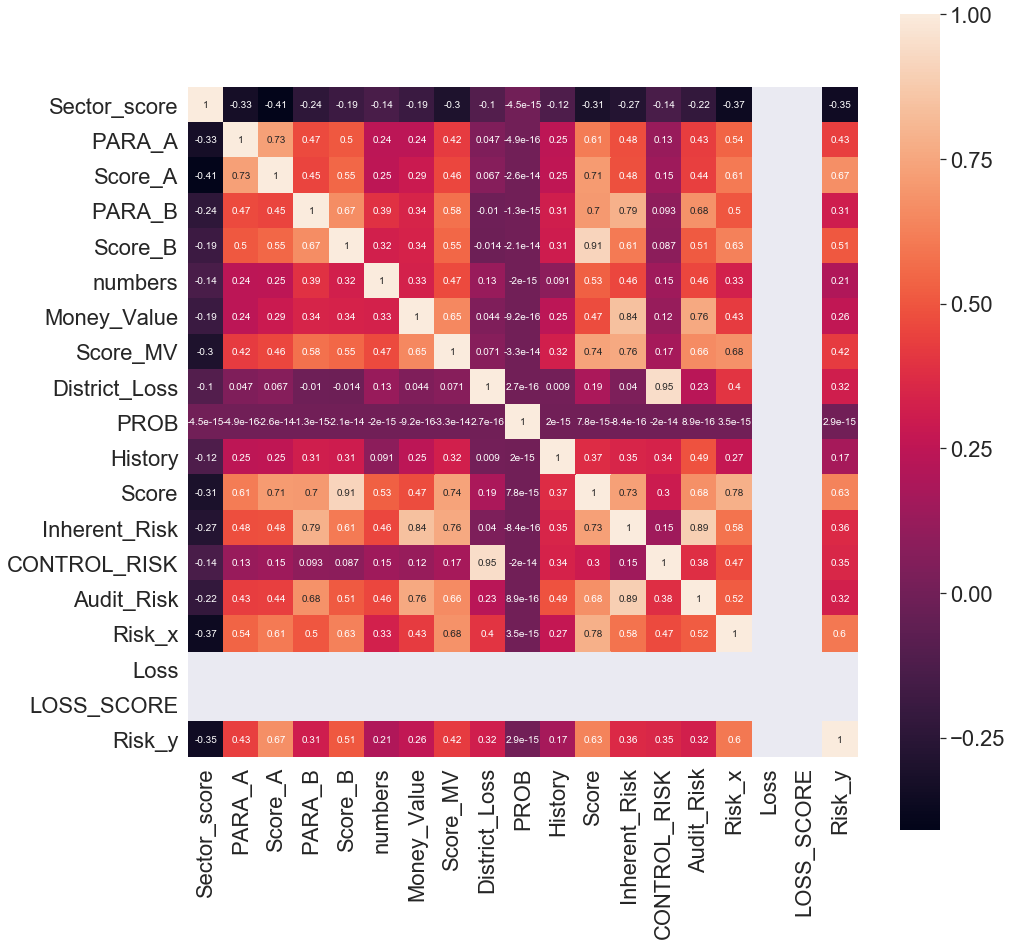

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt
fig = plt.subplots(figsize = (15,15))
sn.set(font_scale=2.0)
sn.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()


# Now to create target and data for our regression tasks


In [26]:
y_reg=df['Audit_Risk']
cols=list(df.columns)
cols.remove('Audit_Risk')
cols.remove('Risk_x')
cols.remove('Risk_y')
X_reg=df[cols]


## I shall now look at the data once more before starting to create models


In [27]:
print(X_reg.info())
print(X_reg.nunique())
print(X_reg.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 762
Data columns (total 18 columns):
Sector_score     716 non-null float64
PARA_A           716 non-null float64
Score_A          716 non-null float64
PARA_B           716 non-null float64
Score_B          716 non-null float64
numbers          716 non-null float64
Money_Value      716 non-null float64
Score_MV         716 non-null float64
District_Loss    716 non-null int64
PROB             716 non-null float64
History          716 non-null int64
Score            716 non-null float64
Inherent_Risk    716 non-null float64
CONTROL_RISK     716 non-null float64
Risk_x           716 non-null int64
Loss             716 non-null int64
LOSS_SCORE       716 non-null int64
Risk_y           716 non-null int64
dtypes: float64(12), int64(6)
memory usage: 106.3 KB
None
Sector_score      12
PARA_A           335
Score_A            3
PARA_B           325
Score_B            3
numbers            3
Money_Value      294
Score_MV          


# Now to remove Prob, Loss and Loss score because they have only one value as well


In [28]:
df.drop('LOSS_SCORE', inplace=True, axis = 1)
df.drop('PROB', inplace=True, axis = 1)
df.drop('Loss', inplace=True, axis = 1)
X_reg.drop('LOSS_SCORE', inplace=True, axis = 1)
X_reg.drop('PROB', inplace=True, axis = 1)
X_reg.drop('Loss', inplace=True, axis = 1)


In [29]:
print(df.shape,df.columns)
print(X_reg.shape,X_reg.columns)

(716, 16) Index(['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'numbers',
       'Money_Value', 'Score_MV', 'District_Loss', 'History', 'Score',
       'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk', 'Risk_x', 'Risk_y'],
      dtype='object')
(716, 15) Index(['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'numbers',
       'Money_Value', 'Score_MV', 'District_Loss', 'History', 'Score',
       'Inherent_Risk', 'CONTROL_RISK', 'Risk_x', 'Risk_y'],
      dtype='object')


In [30]:
df['Audit_Risk'].describe()

count    716.000000
mean       3.453968
std        7.785496
min        0.280000
25%        0.315600
50%        0.460600
75%        2.211600
max       62.985600
Name: Audit_Risk, dtype: float64


# Now I am prepared to start making models for regression.
## Let's draw a few plots of the data before proceeding


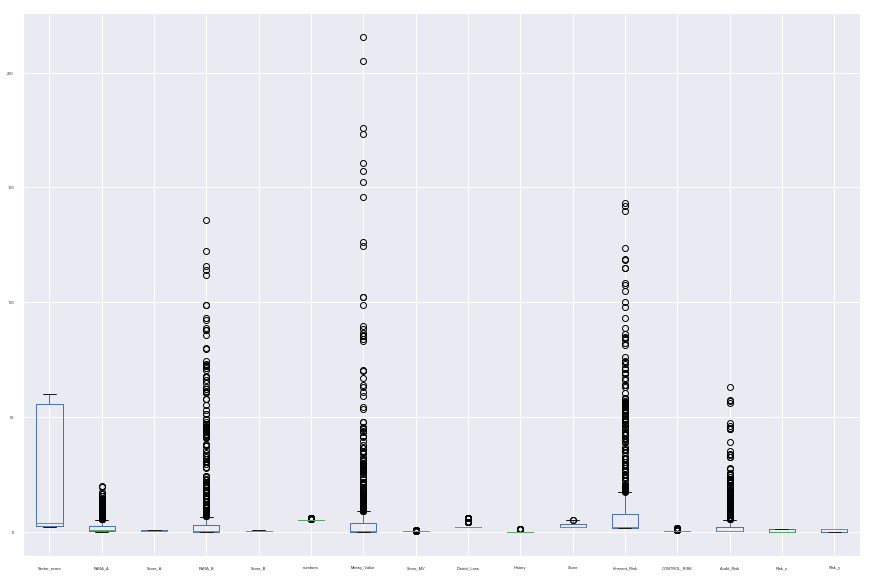

In [31]:
import matplotlib.pyplot as plt
ax = df.plot(kind='box',figsize=(15,10),legend=True, fontsize=4)
plt.show()

C:\Users\anant\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


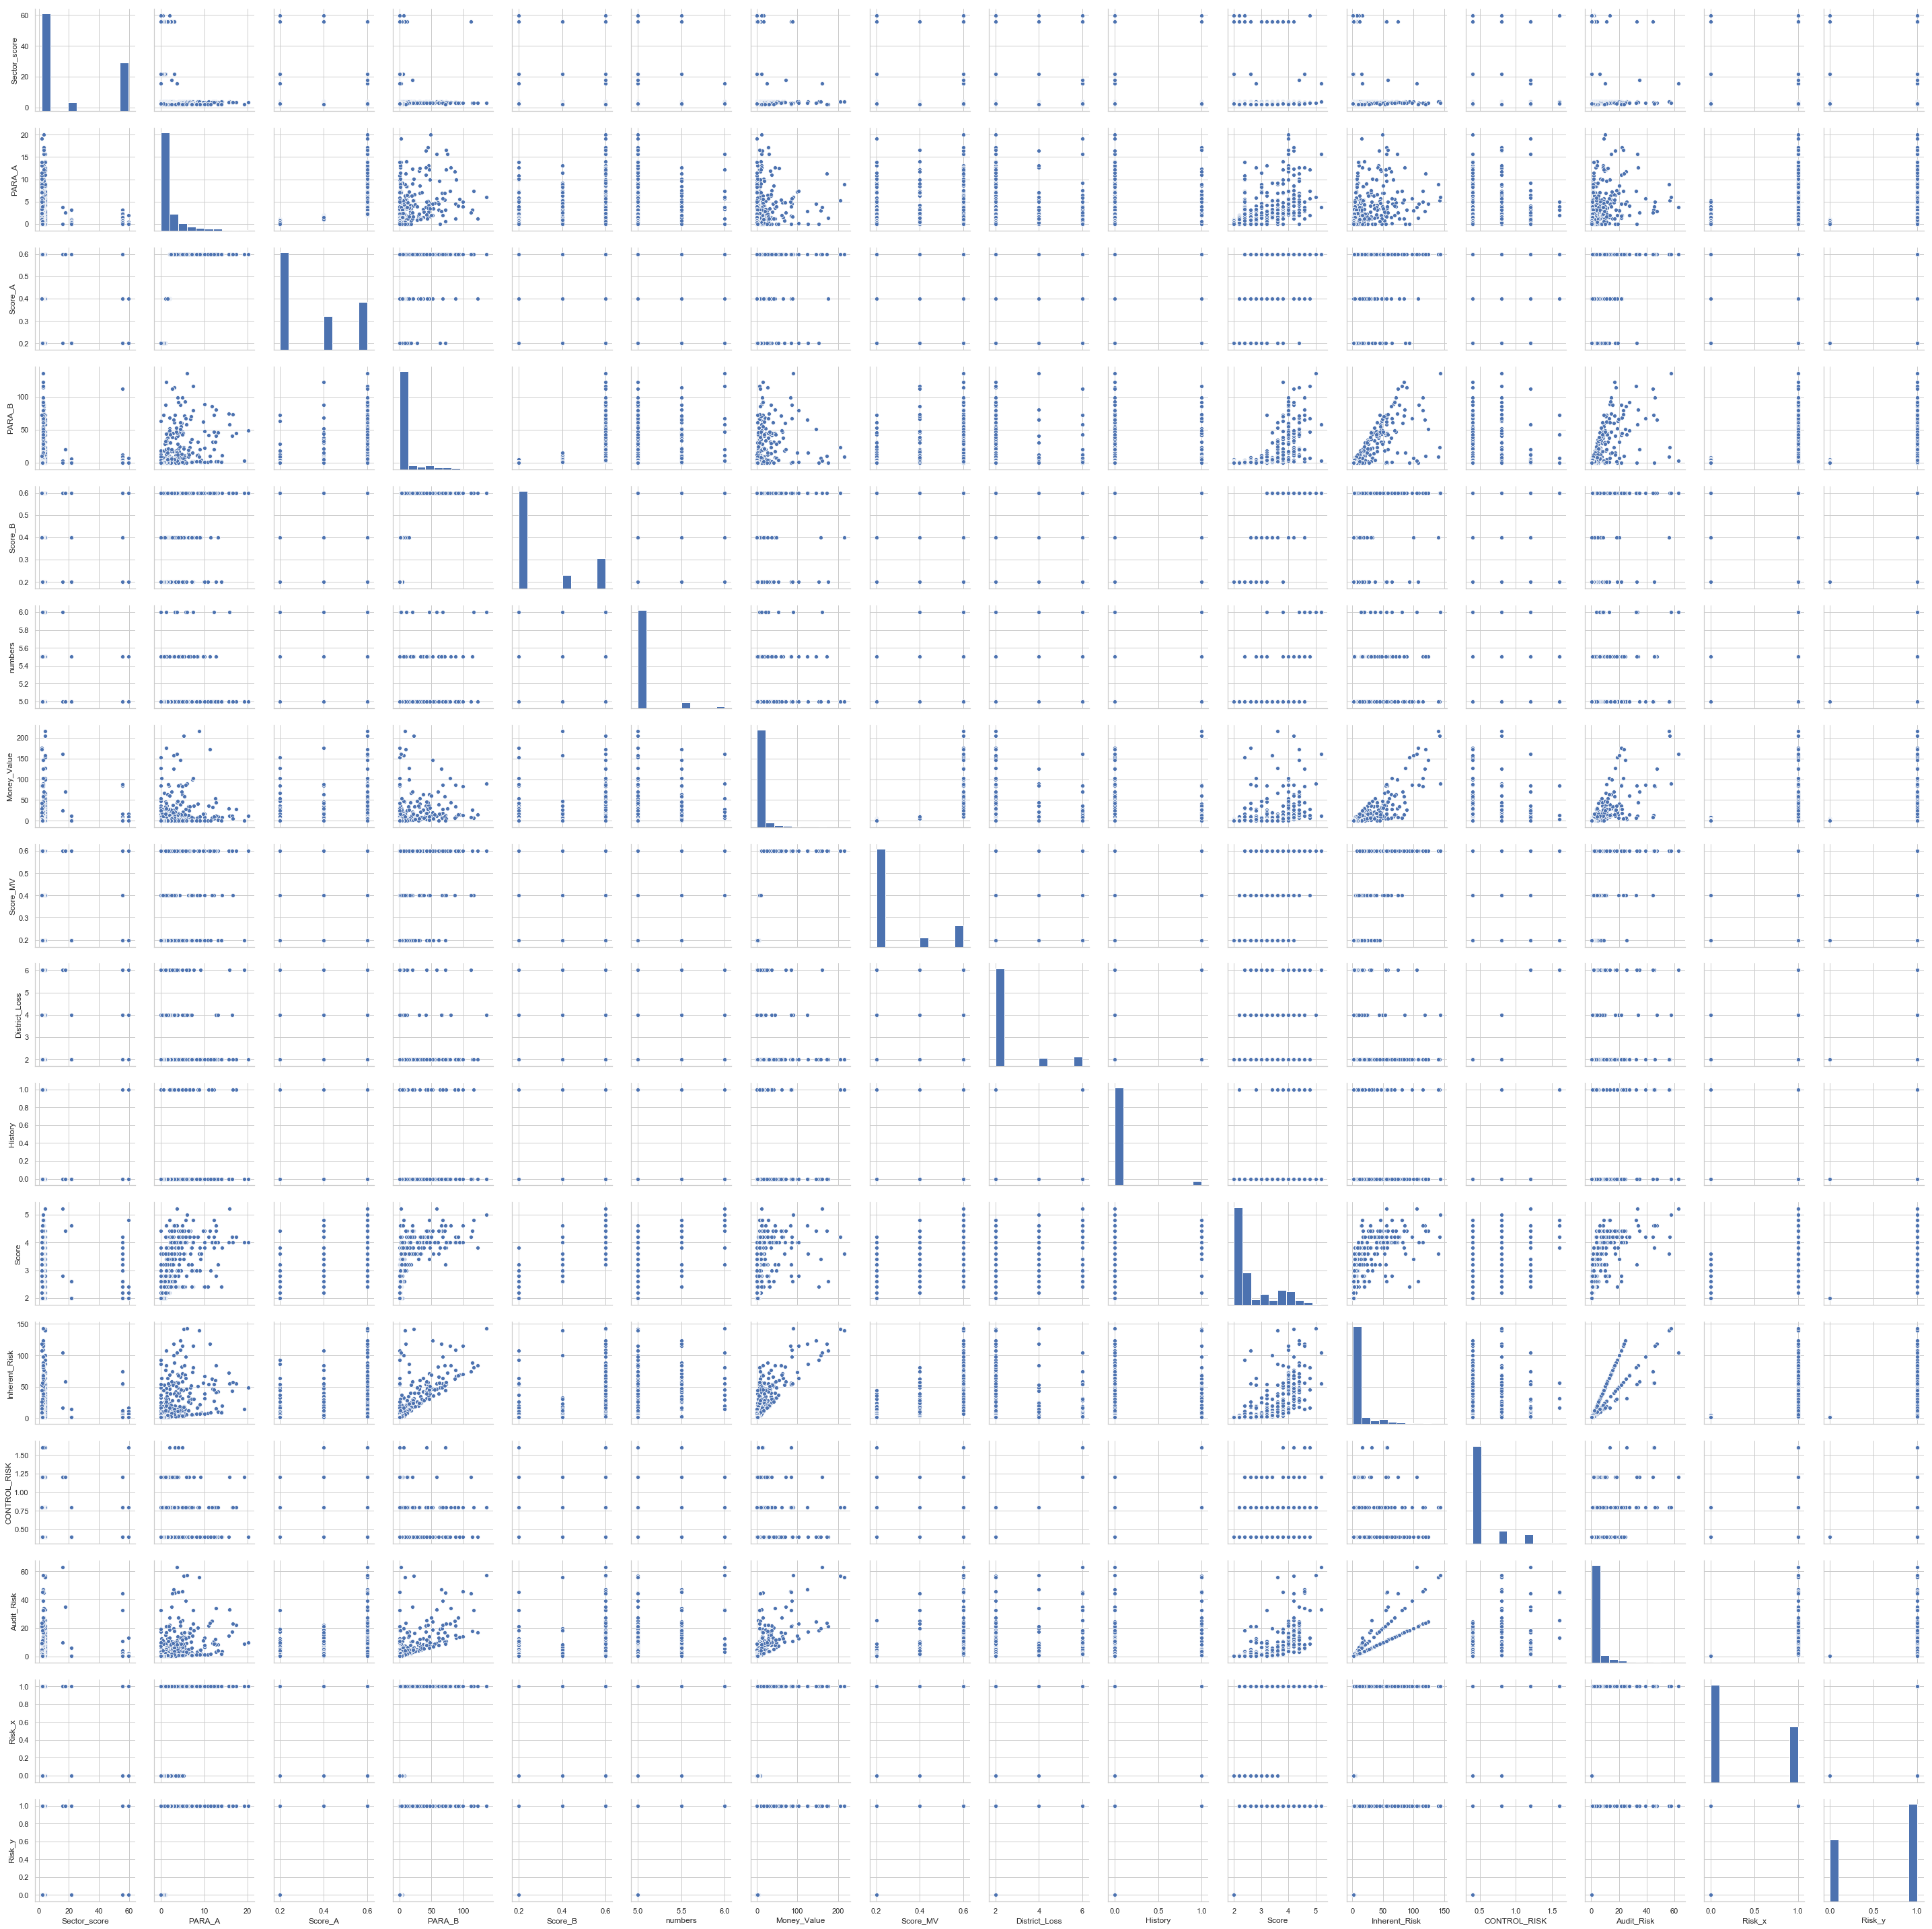

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(df, size = 2.5)
plt.show()
#please click on the image to view in detail


# I shall use standard scaler because I have removed a lot ofoutliers and the data would be skewed very badly if I use MinMax Scaler


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, random_state=0)
kfold3 = KFold(n_splits=3, random_state=0)
kfold2 = KFold(n_splits=2, random_state=0)
kfold1 = KFold(n_splits=10, random_state=0)
X_train_org, X_test_org, y_train, y_test = train_test_split(X_reg, y_reg, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

result_reg=pd.DataFrame(columns=['Best_Parameters','Model','Test_score','Train_score'])

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\anant\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  



# Now I shall create a linear regression model


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

lreg = LinearRegression()
lreg.fit(X_train, y_train)
train=cross_val_score(lreg, X_train, y_train, cv=kfold3).mean()
test=cross_val_score(lreg, X_test, y_test, cv=kfold3).mean()
print('Train score: ',train)
print('Test score: ',test)

Train score:  0.8881740300037104
Test score:  0.8258992450442687



## I shall add these to result_reg


In [35]:
result_reg.loc[len(result_reg)]=[[ ],'Linear Regression',test,train] 


## I shall now create a measured~predict graph for linear regression


C:\Users\anant\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


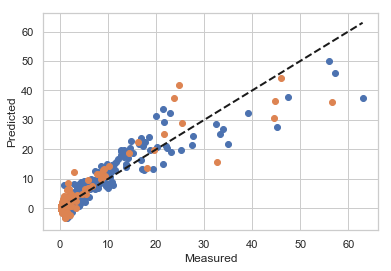

In [36]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(lreg,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(lreg,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now creating lasso 


In [37]:
from sklearn.linear_model import Lasso
param_grid={'alpha':[0.0001,0.001,0.01, 0.1, 0.5, 1, 5, 10]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=kfold3, return_train_score=True)
grid_search.fit(X_train,y_train)

gs_test=cross_val_score(grid_search,X_test,y_test,cv=kfold3).mean()

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

In [38]:
print("Train:",grid_search.best_score_)
print("Test",gs_test)
print("parameters",grid_search.best_params_)

Train: 0.8882169837786025
Test 0.8222240740713286
parameters {'alpha': 0.001}



## I shall add these to result_reg


In [39]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'Lasso',gs_test,grid_search.best_score_] 


## From observing the train and test scores, we can choose alpha  as .001. Let's now plot the coefficients against alpha.


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

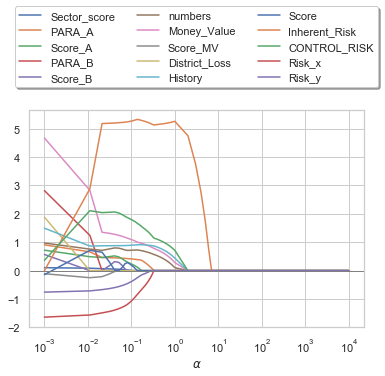

In [40]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(len(X_reg.columns)):
    plt.plot(x_range, coeff[:,i], label = X_reg.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()


## Now I shall create the new dataframe that has undergone variable selection through lasso.


In [41]:
lasso = Lasso(0.001)
lasso.fit(X_train,y_train)
print(lasso.coef_)
X_reg_lassoed=X_reg[X_reg.columns[np.abs(lasso.coef_)>0.00001]]
print(X_reg_lassoed.shape)
print(X_reg.shape)
print("Eliminated variable is",X_reg.columns[np.abs(lasso.coef_)<0.00001])

[ 0.10499432  0.90956927  0.72122658  2.81877839  0.57045144  0.97359019
  4.67100919 -0.10705977  1.88485975  1.4964361  -0.13964071  0.
  0.36509021 -1.63630671 -0.75524338]
(716, 14)
(716, 15)
Eliminated variable is Index(['Inherent_Risk'], dtype='object')


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



## I shall now create a measured~predict graph for lasso


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. Y

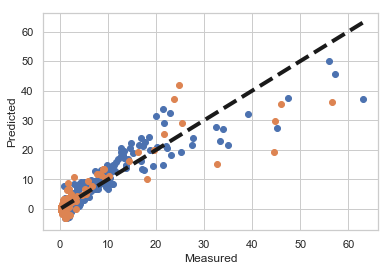

In [42]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


## I shall however, refrain from using it as they do create much impact on the scores of the other models



# Now I shall create a KNN Regressor


In [43]:
from sklearn.neighbors import KNeighborsRegressor
param_grid={'n_neighbors':range(1,10)}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train,y_train)

k_ts=cross_val_score(grid_search, X_test, y_test, cv=kfold).mean()

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

In [44]:
print("Train:",grid_search.best_score_)
print("Test",k_ts)
print("parameters",grid_search.best_params_)

Train: 0.7964197069648057
Test 0.732251086478262
parameters {'n_neighbors': 2}



## Clearly, k=2 gives the best model. I shall now create a measured~predict graph for KNN regressor


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

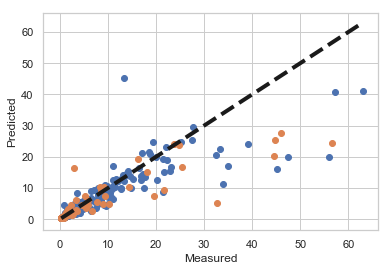

In [45]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


## KNN model is added to result_reg

In [46]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'KNN',k_ts,grid_search.best_score_]


# Now I shall create a ridge model


In [47]:
from  sklearn.linear_model import Ridge

param_grid={'alpha':[0.001,0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(Ridge(), param_grid, cv=kfold3, return_train_score=True)
grid_search.fit(X_train,y_train)
test_ridge=cross_val_score(grid_search,X_test,y_test,cv=kfold3).mean()

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [48]:
print("Train:",grid_search.best_score_)
print("Test",test_ridge)
print("parameters",grid_search.best_params_)

Train: 0.888703265775048
Test 0.8453072610231764
parameters {'alpha': 10}



## I shall add these to result_reg


In [49]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'Ridge',test_ridge,grid_search.best_score_]


## Let's now plot the coefficients against alpha for Ridge.


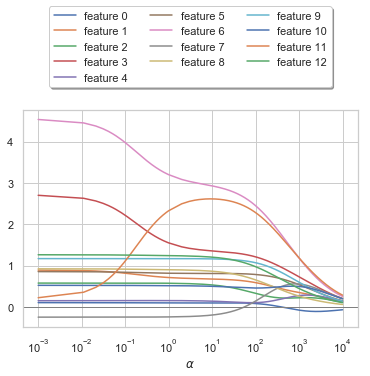

In [50]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()


## I shall now create a measured~predict graph for Ridge


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

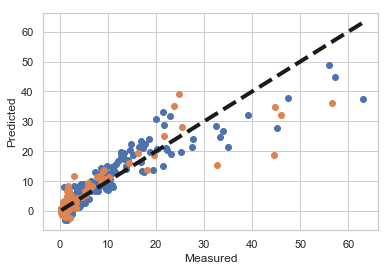

In [51]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I shall create a polynomial model


In [52]:
from  sklearn.preprocessing  import PolynomialFeatures
train_s_list = []
test_s_list = []
for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    train_s_list.append(cross_val_score(lreg, X_train_poly, y_train,scoring='r2',cv=kfold).mean())
    lreg.fit(X_train_poly, y_train)
    model=lreg
    test_s_list.append(cross_val_score(lreg,X_test_poly, y_test,scoring='r2',cv=kfold).mean())

In [53]:
print(train_s_list)
print(test_s_list)

[0.8774980373447414, 0.9999794294161534, 0.9866307430562304, 0.9403037386575501]
[0.8102894848809836, 0.9922420944871744, 0.9539370660711226, 0.34076765305521656]



## Clearly polynomial of degree 2 gives best model


In [54]:
print("Train",train_s_list[1])
print("Test",test_s_list[1])
print("Best Parameters n=",2)

Train 0.9999794294161534
Test 0.9922420944871744
Best Parameters n= 2



## I shall add these to result_reg


In [55]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'Polynomial',test_s_list[1],train_s_list[1]]


## I shall now create a measured~predict graph for polynomial regression


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

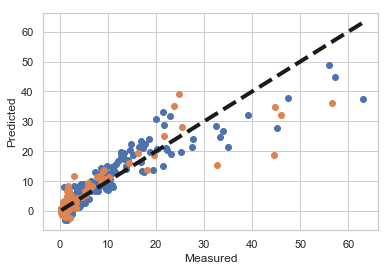

In [56]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I shall create a Linear SVR model


In [57]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 0.5, 10, 100], 'max_iter':[50000]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv=kfold1, return_train_score=True)

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,scoring='r2',cv=kfold).mean()

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

In [58]:
print("Train set score with best parameters: {:.5f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.81903
Test set score with best parameters: 0.79402
best parameters are: {'C': 0.5, 'max_iter': 50000}



## I shall add these to result_reg


In [59]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'LinearSVC',test,grid_search.best_score_]


## I shall now create a measured~predict graph for linear SVR


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  Deprecat

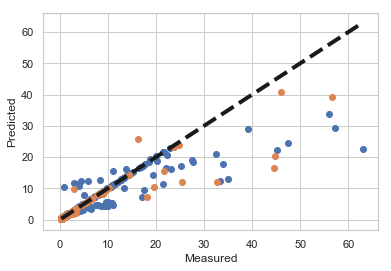

In [60]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I shall create a SVR with linear kernel trick


In [61]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 250, 10, 100], 'max_iter':[60000]}
grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=kfold2, return_train_score=True)

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,scoring='r2',cv=kfold2).mean()
train=cross_val_score(grid_search,X_train, y_train,scoring='r2',cv=kfold2).mean()



C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=60000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=60000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=60000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=60000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-pa

In [62]:
print("Train set score with best parameters: {:.5f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.81557
Test set score with best parameters: 0.76583
best parameters are: {'C': 250, 'max_iter': 60000}



## I shall add these to result_reg


In [63]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'SVC-linear',test,train]


## I shall now create a measured~predict graph for SVC linear kernel trick


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=60000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=60000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=60000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=60000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-pa

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=60000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=60000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=60000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=60000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-pa

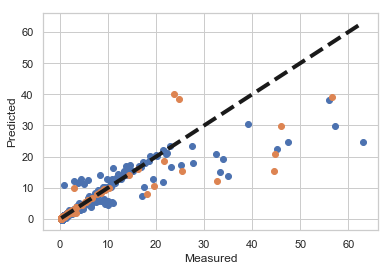

In [64]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I shall create a SVR with polynomial kernel trick


In [65]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500],'degree':[1,2,3,4]}
grid_search = GridSearchCV(SVR(kernel='poly'), param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,scoring='r2',cv=kfold).mean();
train=cross_val_score(grid_search,X_train, y_train,scoring='r2',cv=kfold).mean();

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

In [66]:
print("Train set score with best parameters: {:.5f}".format(train))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.97930
Test set score with best parameters: 0.91108
best parameters are: {'C': 10, 'degree': 2}



## I shall add these to result_reg


In [67]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'SVC-polynomial',test,train]


## I shall now create a measured~predict graph for SVR polynomial


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

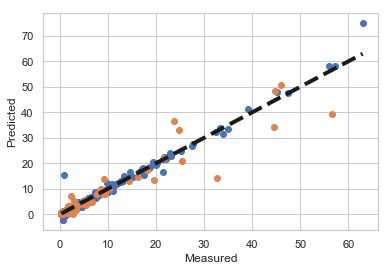

In [68]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I shall create a SVR with rbf kernel trick


In [69]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001,0.01, 10, 0.1, 1, 250, 100,500],'gamma':[0.001,0.01, 10, 0.1, 1, 250, 100]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,scoring='r2',cv=kfold).mean();
train=cross_val_score(grid_search,X_train, y_train,scoring='r2',cv=kfold).mean();

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

In [70]:
print("Train set score with best parameters: {:.5f}".format(train))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.98338
Test set score with best parameters: 0.93796
best parameters are: {'C': 500, 'gamma': 0.01}



## I shall add these to result_reg


In [71]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'SVC-rbf',test,train]


## I shall now create a measured~predict graph for SVR rbf


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

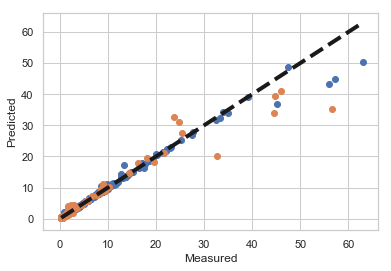

In [72]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now creating SGD Regressor( we decided to let alpha just be at 0.0001)


In [73]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 50000, penalty = 'l1')
sgd_reg2 = SGDRegressor(random_state= 0, max_iter = 50000, penalty = 'l2')
sgd_reg.fit(X_train, y_train)
sgd_reg2.fit(X_train, y_train)
tr1=cross_val_score(sgd_reg,X_train, y_train,cv=5).mean()
te1=cross_val_score(sgd_reg,X_test, y_test,cv=5).mean()
tr2=cross_val_score(sgd_reg2,X_train, y_train,cv=5).mean()
te2=cross_val_score(sgd_reg2,X_test, y_test,cv=5).mean()

from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001,0.01, 10, 0.1, 1, 250, 100,500],'penalty':['l1','l2']}
grid_search = GridSearchCV(SGDRegressor(), param_grid, cv=5, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,scoring='r2',cv=kfold).mean();
train=cross_val_score(grid_search,X_train, y_train,scoring='r2',cv=kfold).mean();


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

In [74]:
print("Train set score with best parameters: {:.5f}".format(train))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.87201
Test set score with best parameters: 0.83217
best parameters are: {'alpha': 0.01, 'penalty': 'l1'}



## I shall add these to result_reg


In [75]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'SGD',test,train]


## I shall now create a measured~predict graph for sgd regression


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

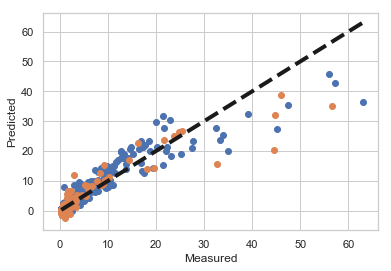

In [76]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I will build a Decision Tree Regressor


In [77]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)
train=cross_val_score(tree, X_train, y_train, cv=2).mean()
test=cross_val_score(tree, X_test, y_test, cv=2).mean()
print("train",train)
print("test",test)

train 0.912601975258357
test 0.3857929002536965



## I shall add these to result_reg


In [78]:
result_reg.loc[len(result_reg)]=[[],'Decision Tree',test,train]


## I shall now create a measured~predict graph for Decision Tree


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

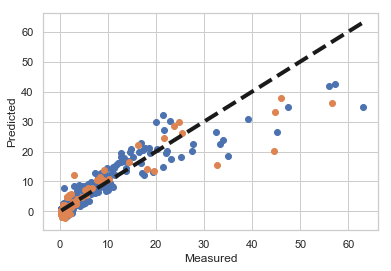

In [79]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now let's look at the performance of our models


In [80]:
print(result_reg)

                     Best_Parameters              Model  Test_score  \
0                                 []  Linear Regression    0.825899   
1                   {'alpha': 0.001}              Lasso    0.822224   
2                 {'n_neighbors': 2}                KNN    0.732251   
3                      {'alpha': 10}              Ridge    0.845307   
4                      {'alpha': 10}         Polynomial    0.992242   
5      {'C': 0.5, 'max_iter': 50000}          LinearSVC    0.794024   
6      {'C': 250, 'max_iter': 60000}         SVC-linear    0.765828   
7             {'C': 10, 'degree': 2}     SVC-polynomial    0.911084   
8          {'C': 500, 'gamma': 0.01}            SVC-rbf    0.937959   
9   {'alpha': 0.01, 'penalty': 'l1'}                SGD    0.832175   
10                                []      Decision Tree    0.385793   

    Train_score  
0      0.888174  
1      0.888217  
2      0.796420  
3      0.888703  
4      0.999979  
5      0.819031  
6      0.803867  
7  

# At the end of all the regression models we have constructed, it is clear that the Polynomial model is best.

In [81]:
from  sklearn.preprocessing  import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)
test=(cross_val_score(lreg,X_test_poly, y_test,scoring='r2',cv=kfold).mean())
print(test)

0.9922420944871744



# I shall move on to the classification tasks and begin by separating the targets and independent variables. 



## Let's plot graphs for the Risk_x(Risk from Audit Risk) and Risk_y(Risk form trial)


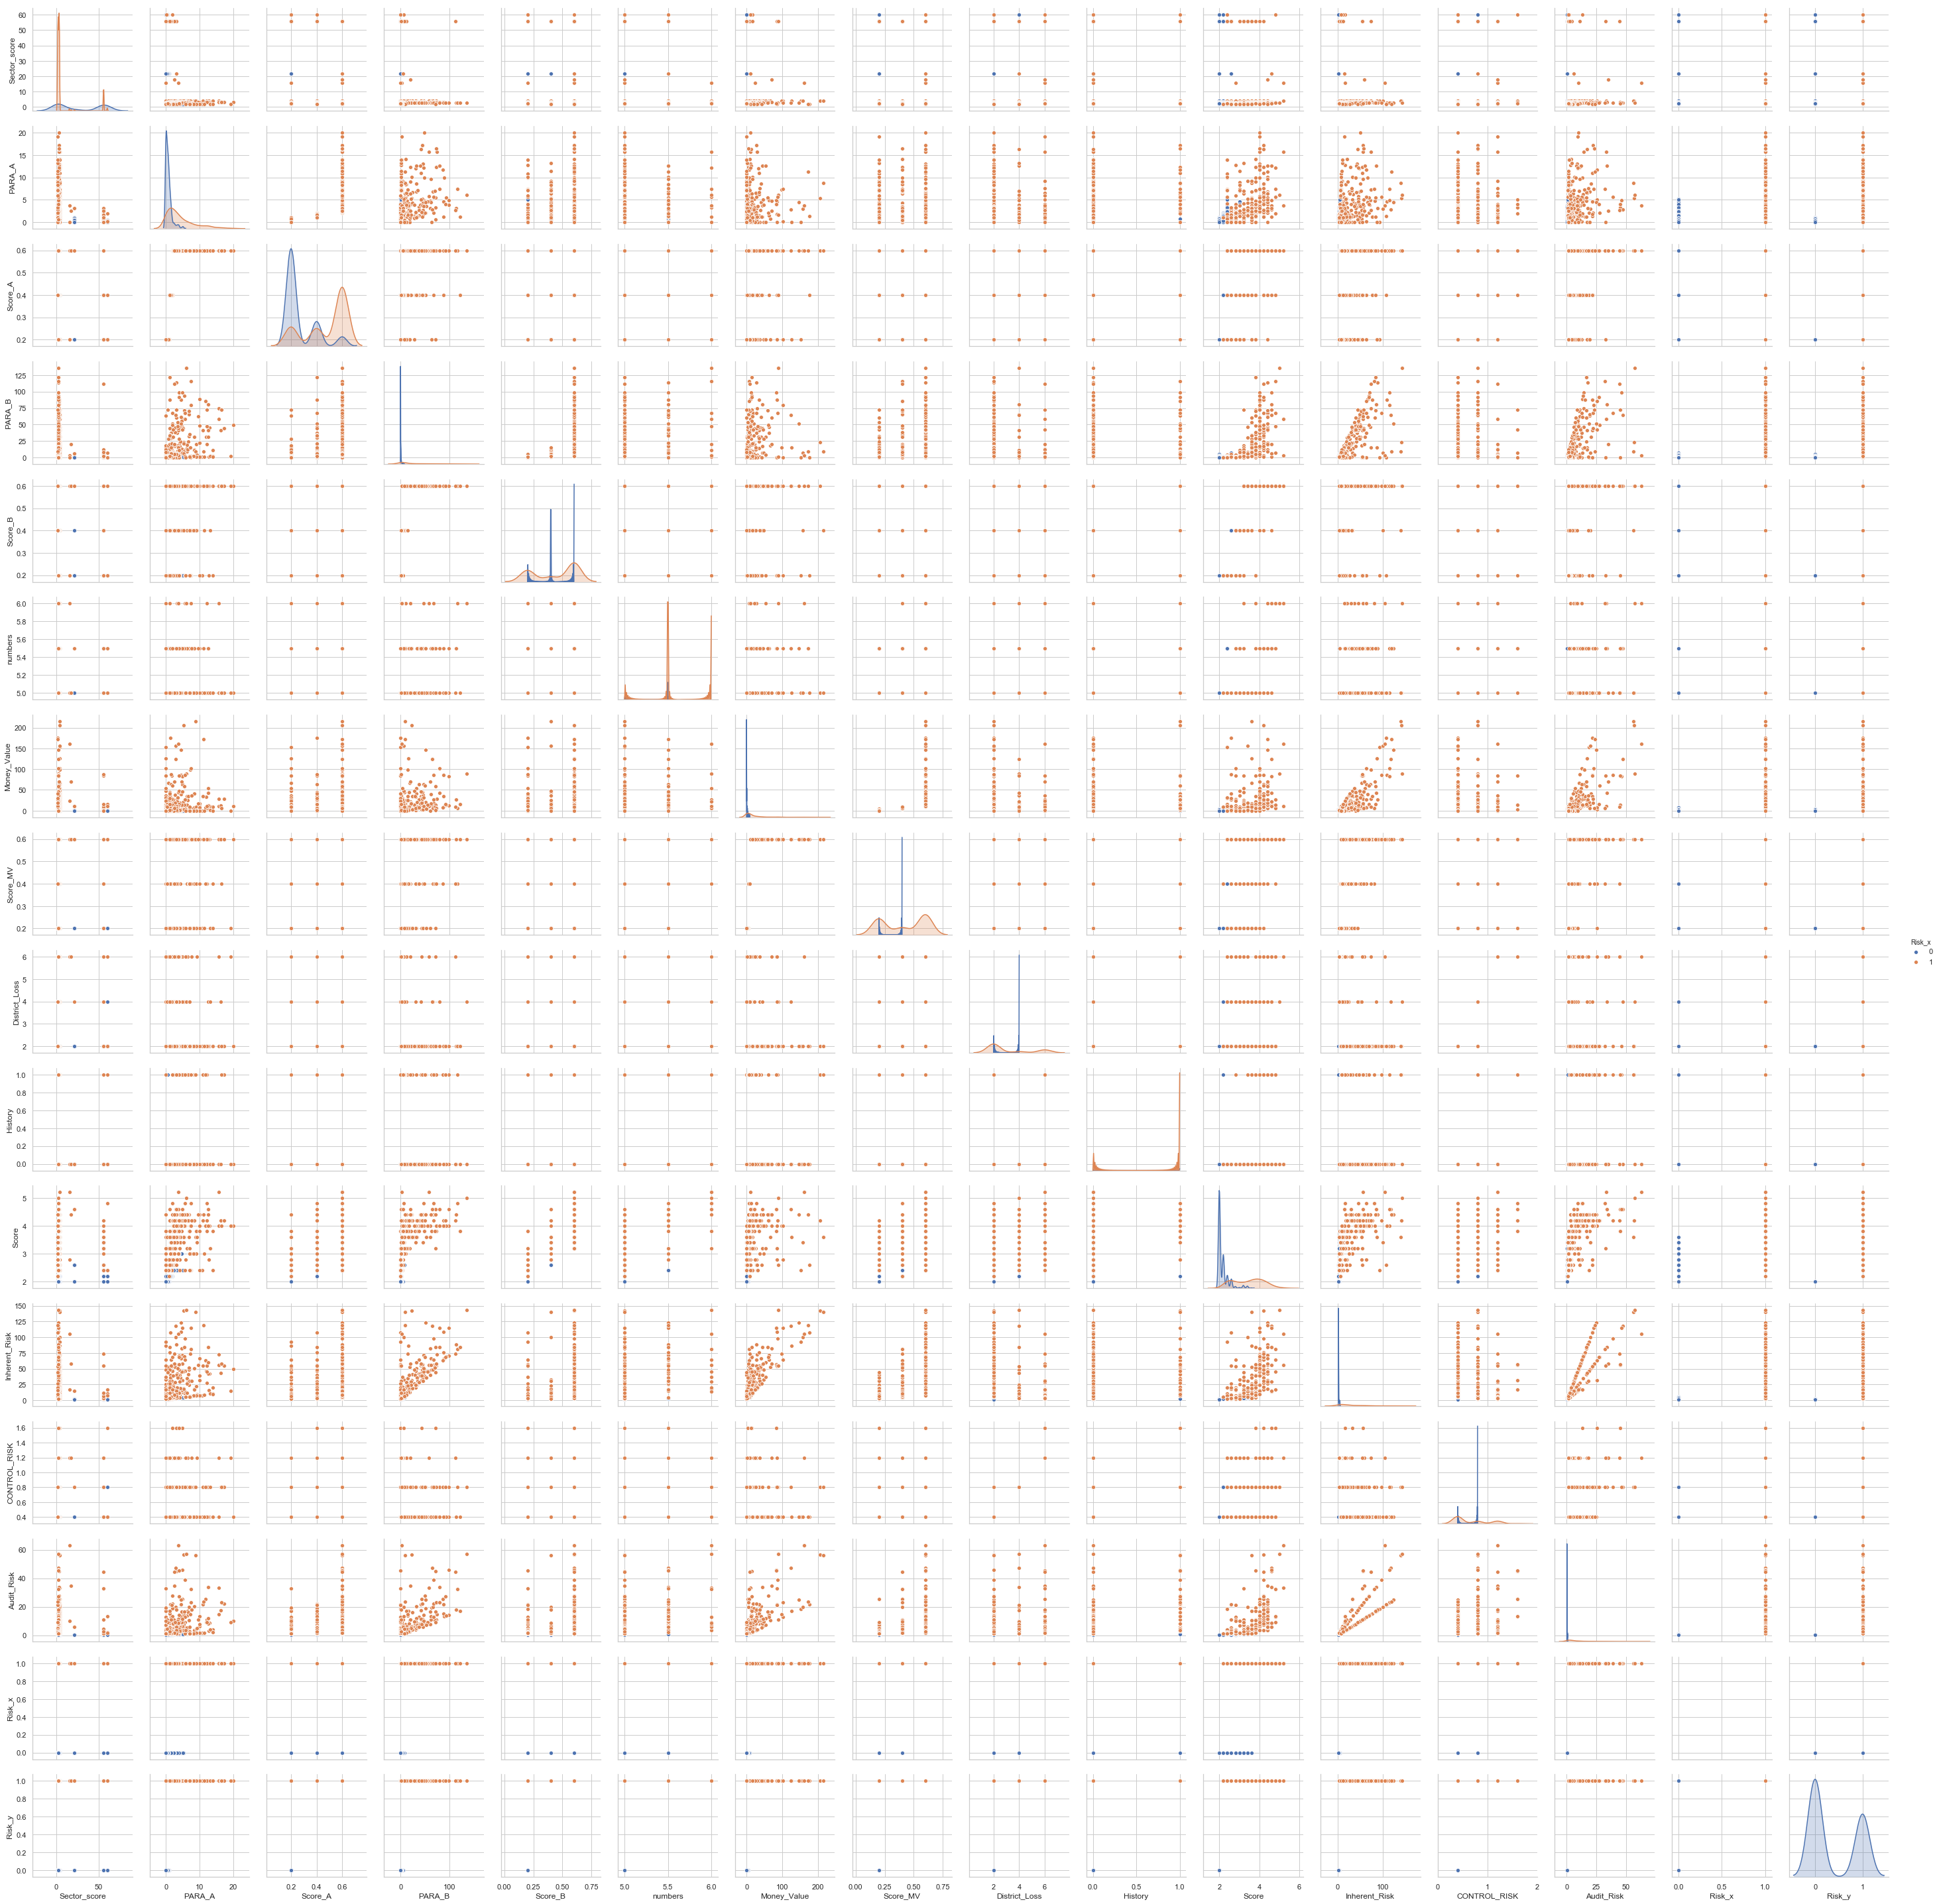

In [82]:
sns.pairplot(df,hue="Risk_x")

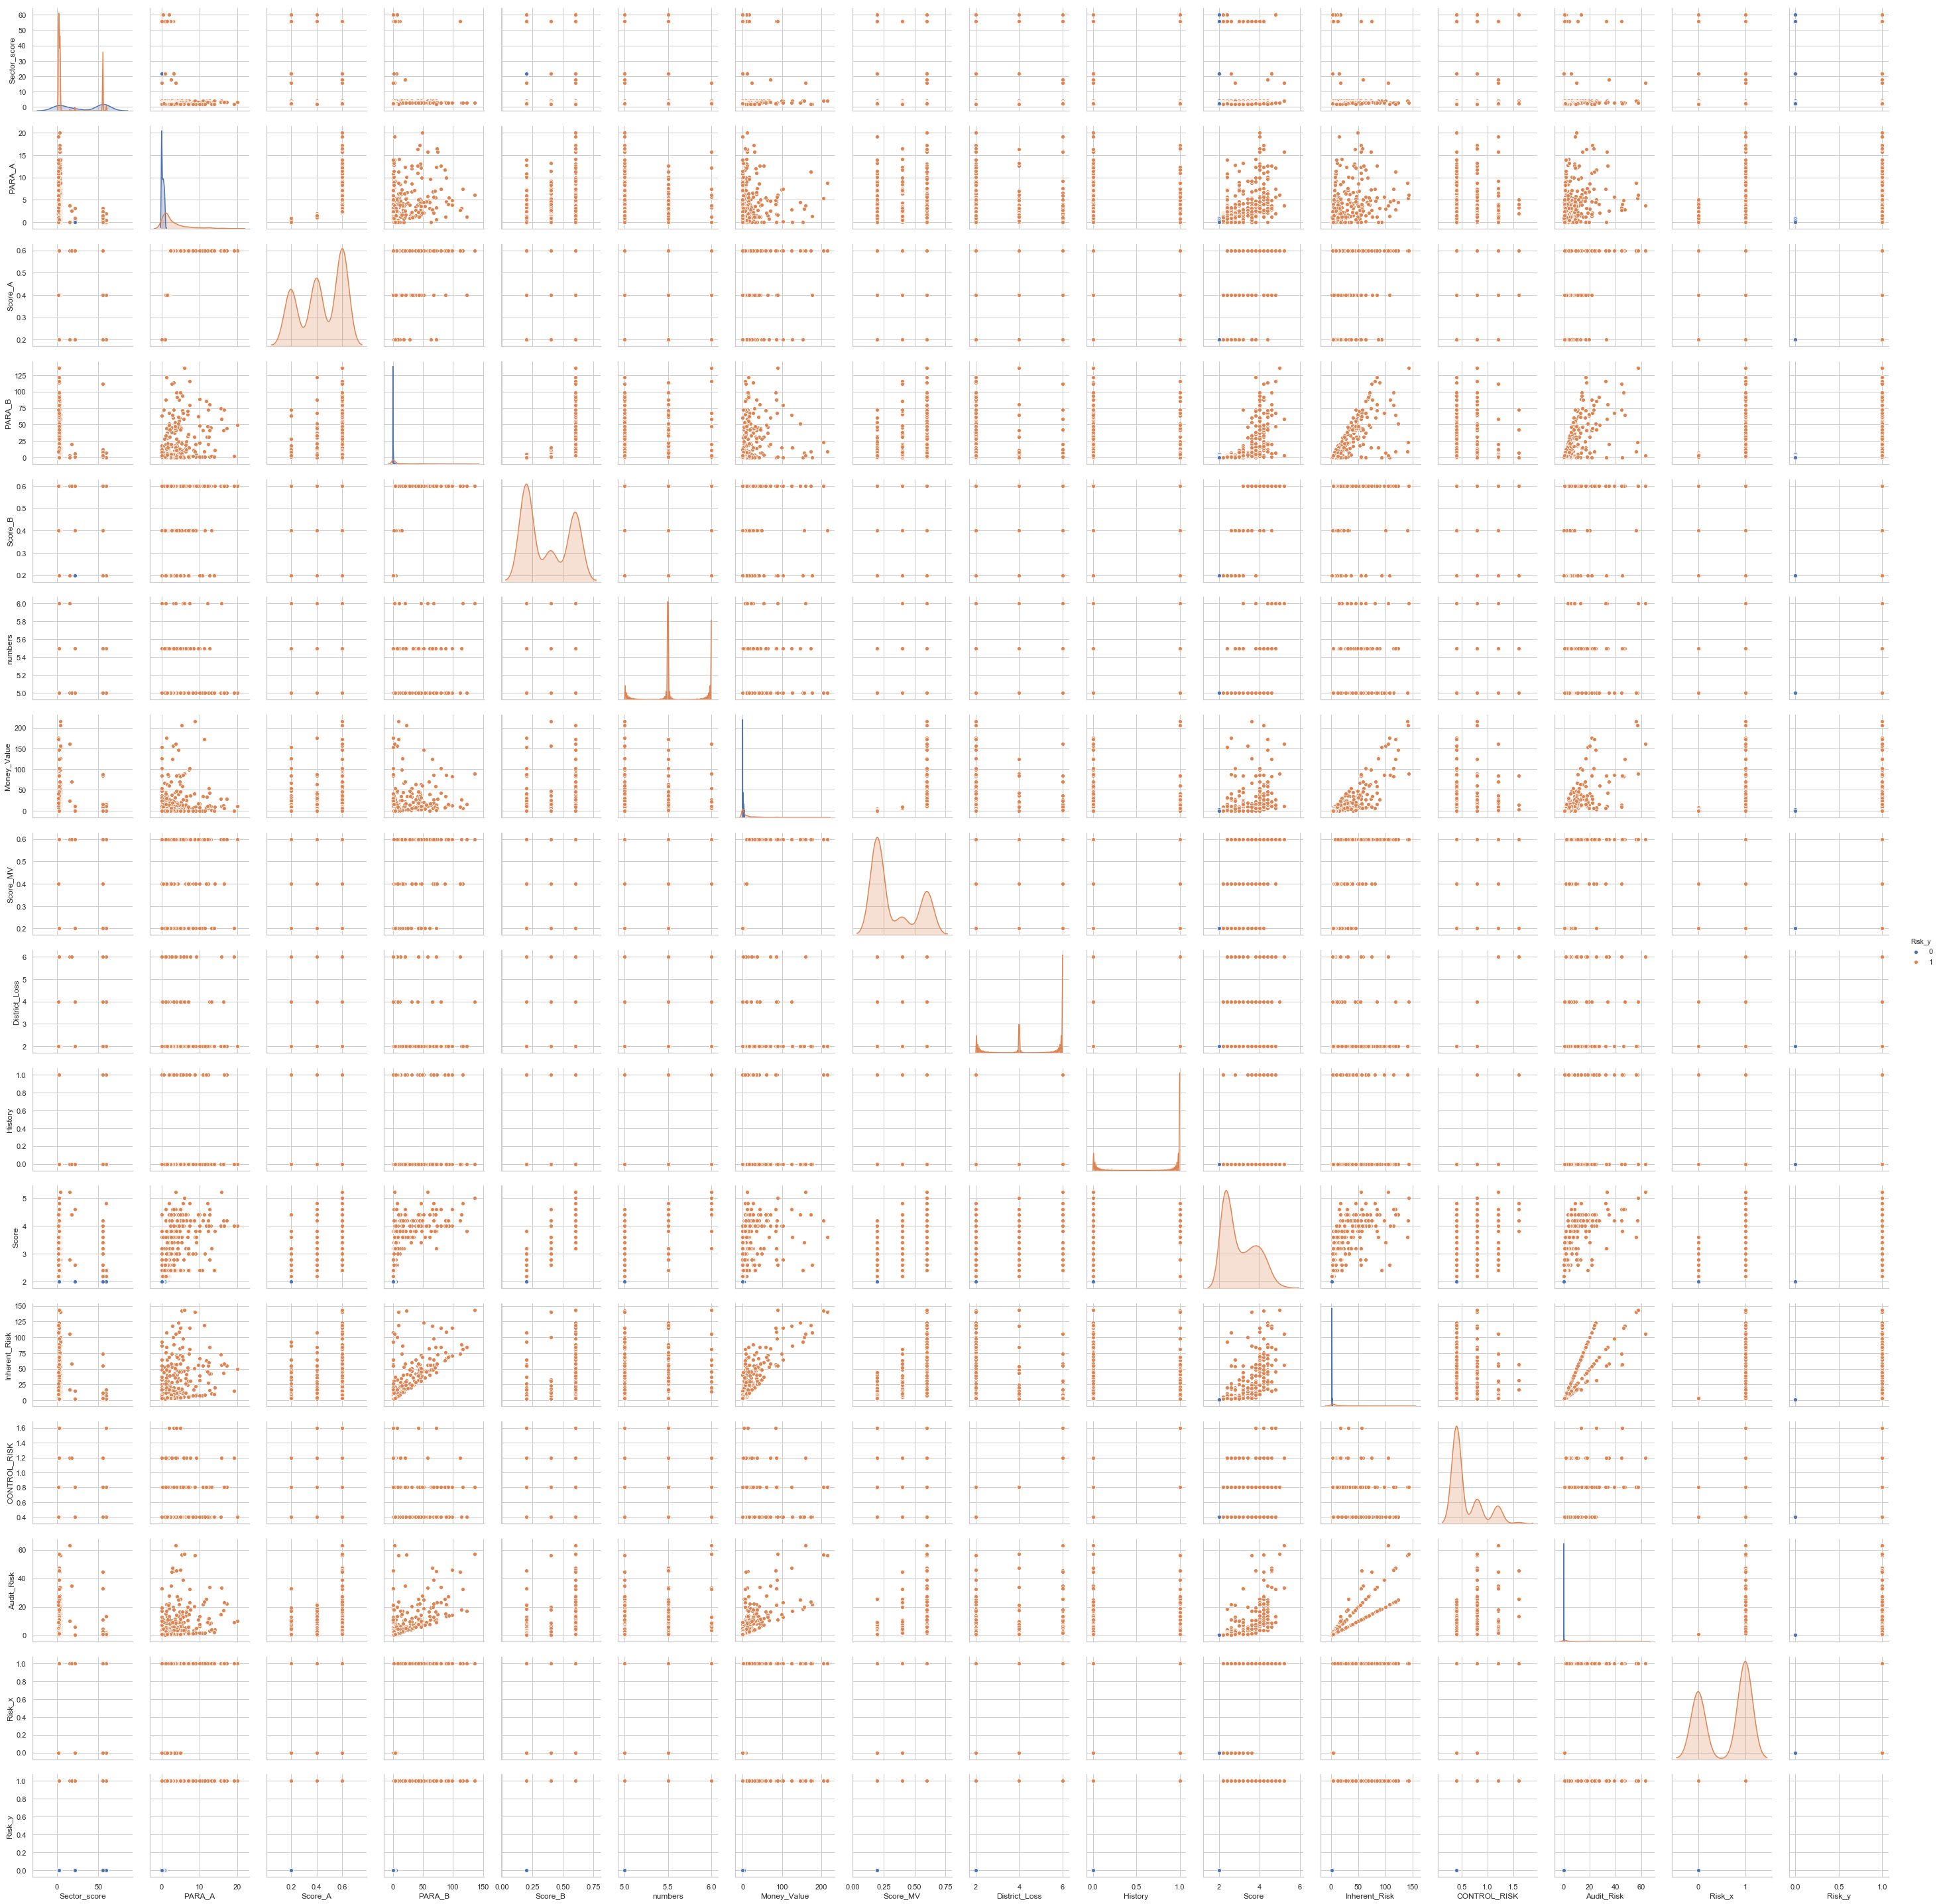

In [83]:
sns.pairplot(df,hue="Risk_y")


# I shall create models with Risk_x and Risk_y as the targets as it is unclear which one is meant to be our target(better safe than sorry)


In [84]:
y1=df['Risk_x']
y2=df['Risk_y']
col=list(df.columns)
col.remove('Risk_x')
X_c1=df[col]
result1=pd.DataFrame(columns=['Best_Parameters','Model','Test_score','Train_score'])
col=list(df.columns)
col.remove('Risk_y')
X_c2=df[col]
result2=pd.DataFrame(columns=['Best_Parameters','Model','Test_score','Train_score'])
print(X_c1.columns)
print(X_c2.columns)

Index(['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'numbers',
       'Money_Value', 'Score_MV', 'District_Loss', 'History', 'Score',
       'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk', 'Risk_y'],
      dtype='object')
Index(['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'numbers',
       'Money_Value', 'Score_MV', 'District_Loss', 'History', 'Score',
       'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk', 'Risk_x'],
      dtype='object')


In [85]:
print(y1.mean())
print(y2.mean())

0.361731843575419
0.611731843575419



## Clearly the data is imbalanced to a reasonable degree and hence using accuracy as the measuring parameter will not be sufficient



# I shall now apply scaling and build models for Risk_x


In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y1 = np.array([number[0] for number in lb.fit_transform(y1)])
X_train_org, X_test_org, y_train, y_test = train_test_split(X_c1, y1, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\anant\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]



## I have decided to use f1 score as the scoring parameter as I think it's of paramount importance to detect fraud and f1 score by giving us harmonic mean of recall and percision is the best metric 



# I shall now build a KNN classifier model.


In [87]:
from sklearn.neighbors import KNeighborsClassifier

param_grid={'n_neighbors':range(1,10)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_train,y_train)

k_ts=cross_val_score(grid_search, X_test, y_test, cv=kfold,scoring='f1').mean()

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

In [88]:
print("Train:",grid_search.best_score_)
print("Test",k_ts)
print("parameters",grid_search.best_params_)

Train: 0.9642225094024022
Test 0.9000021123041717
parameters {'n_neighbors': 1}



## Writing to result1


In [89]:
result1.loc[len(result1)]=[grid_search.best_params_,'KNN',k_ts,grid_search.best_score_]

In [90]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation


## Classification report and confusion matrix


              precision    recall  f1-score   support

   not fraud       0.95      0.98      0.96       127
       fraud       0.94      0.87      0.90        52

   micro avg       0.94      0.94      0.94       179
   macro avg       0.94      0.92      0.93       179
weighted avg       0.94      0.94      0.94       179



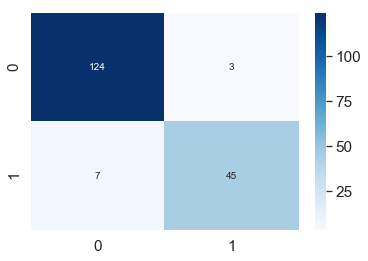

In [91]:
from sklearn.metrics import classification_report
sn.set(font_scale=1.4)
sn.heatmap(confusion, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues')
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))


# I shall now build logistic model


In [92]:
from sklearn.linear_model import LogisticRegression

param_grid={'penalty':['l1','l2'],'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_train,y_train)

k_ts=cross_val_score(grid_search, X_test, y_test, cv=kfold,scoring='f1').mean()

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\An

In [93]:
print("Train:",grid_search.best_score_)
print("Test",k_ts)
print("parameters",grid_search.best_params_)

Train: 0.9948734230378169
Test 0.9387044534412954
parameters {'C': 100, 'penalty': 'l1'}



## Writing to result1


In [94]:
result1.loc[len(result1)]=[grid_search.best_params_,'Logistic Regression',k_ts,grid_search.best_score_]


## Classification report and confusion matrix


In [95]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\An

              precision    recall  f1-score   support

   not fraud       0.97      0.98      0.97       127
       fraud       0.94      0.92      0.93        52

   micro avg       0.96      0.96      0.96       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.96      0.96      0.96       179



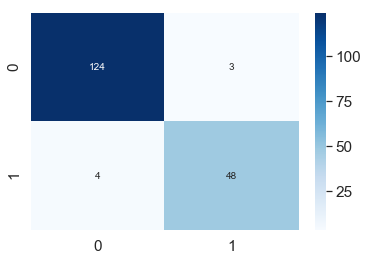

In [96]:
from sklearn.metrics import classification_report
sn.set(font_scale=1.4)
sn.heatmap(confusion, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues')
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))


# Now creating a SVC with polynomial kernel trick


In [97]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500],'degree':[1,2,3,4]}
grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=kfold, return_train_score=True,scoring='f1');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='f1').mean();

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\An

In [98]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9902413783797114
Test 0.921060985797828
parameters {'C': 500, 'degree': 1}



## Writing to result1


In [99]:
result1.loc[len(result1)]=[grid_search.best_params_,'SVC-polynomial',test,grid_search.best_score_]


## Classification report and confusion matrix


In [100]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecati

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\An

              precision    recall  f1-score   support

   not fraud       0.97      0.98      0.97       127
       fraud       0.94      0.92      0.93        52

   micro avg       0.96      0.96      0.96       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.96      0.96      0.96       179



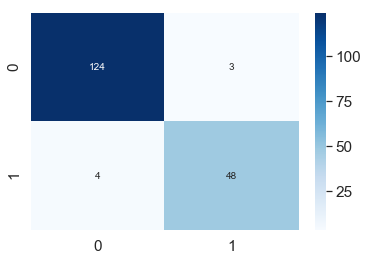

In [101]:
from sklearn.metrics import classification_report
sn.set(font_scale=1.4)
sn.heatmap(confusion, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues')
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))


# Creating SVC with rbf kernel


In [102]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500],'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=kfold, return_train_score=True, scoring='f1');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\An

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\An

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\An

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [103]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9773876517541875
Test 0.9503759398496241
parameters {'C': 250, 'gamma': 0.01}



## Writing to result1


In [104]:
result1.loc[len(result1)]=[grid_search.best_params_,'SVC rbf',test,grid_search.best_score_]


## Classification report and confusion matrix


In [105]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\An

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\An

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\An

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\An

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

              precision    recall  f1-score   support

   not fraud       0.97      0.99      0.98       127
       fraud       0.98      0.92      0.95        52

   micro avg       0.97      0.97      0.97       179
   macro avg       0.97      0.96      0.97       179
weighted avg       0.97      0.97      0.97       179



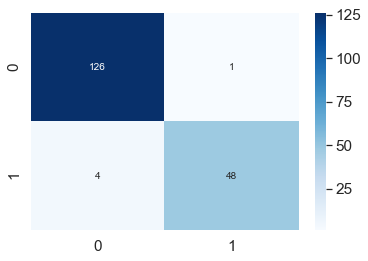

In [106]:
from sklearn.metrics import classification_report
sn.set(font_scale=1.4)
sn.heatmap(confusion, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues')
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))


# Creating an SVC with linear kernel


In [107]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=kfold, return_train_score=True,scoring='f1');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='f1').mean();

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

In [108]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9925073369385727
Test 0.921060985797828
parameters {'C': 250}



## Writing to result1


In [109]:
result1.loc[len(result1)]=[grid_search.best_params_,'SVC linear',test,grid_search.best_score_]


## Classification report and confusion matrix


In [110]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

              precision    recall  f1-score   support

   not fraud       0.97      0.98      0.97       127
       fraud       0.94      0.92      0.93        52

   micro avg       0.96      0.96      0.96       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.96      0.96      0.96       179



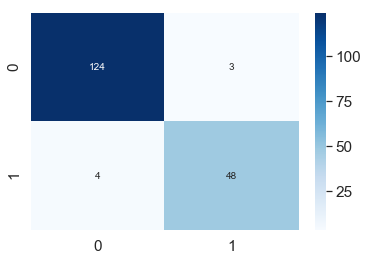

In [111]:
from sklearn.metrics import classification_report
sn.set(font_scale=1.4)
sn.heatmap(confusion, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues')
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))


# Now creating a LinearSVC model


In [112]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500]}
grid_search = GridSearchCV(LinearSVC(),param_grid, cv=kfold, return_train_score=True,scoring='f1');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='f1').mean();

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

In [113]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9948734230378169
Test 0.952244246981089
parameters {'C': 250}



## Writing to result1


In [114]:
result1.loc[len(result1)]=[grid_search.best_params_,'Linear SVC',test,grid_search.best_score_]


## Classification report and confusion matrix


In [115]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

              precision    recall  f1-score   support

   not fraud       0.98      0.98      0.98       127
       fraud       0.96      0.94      0.95        52

   micro avg       0.97      0.97      0.97       179
   macro avg       0.97      0.96      0.97       179
weighted avg       0.97      0.97      0.97       179



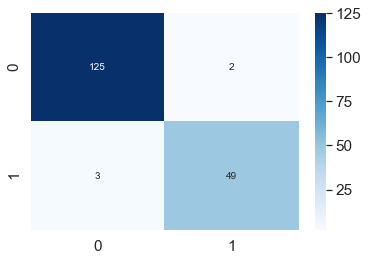

In [116]:
from sklearn.metrics import classification_report
sn.set(font_scale=1.4)
sn.heatmap(confusion, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues')
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))


# Create a decision Tree Classifier


In [117]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_train, y_train)
train=cross_val_score(tree, X_train, y_train, cv=kfold1,scoring='f1').mean()
test=cross_val_score(tree, X_test, y_test, cv=kfold1,scoring='f1').mean()
print("train",train)
print("test",test)

train 1.0
test 1.0



## Writing to result1


In [118]:
result1.loc[len(result1)]=[[],'Decision Tree',test,train]


## Classification report and confusion matrix


              precision    recall  f1-score   support

   not fraud       1.00      1.00      1.00       127
       fraud       1.00      1.00      1.00        52

   micro avg       1.00      1.00      1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



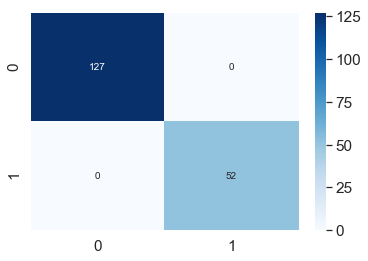

In [119]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(tree,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)
sn.set(font_scale=1.4)
sn.heatmap(confusion, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues')
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))

In [120]:
print(result1)

               Best_Parameters                Model  Test_score  Train_score
0           {'n_neighbors': 1}                  KNN    0.900002     0.964223
1  {'C': 100, 'penalty': 'l1'}  Logistic Regression    0.938704     0.994873
2      {'C': 500, 'degree': 1}       SVC-polynomial    0.921061     0.990241
3    {'C': 250, 'gamma': 0.01}              SVC rbf    0.950376     0.977388
4                   {'C': 250}           SVC linear    0.921061     0.992507
5                   {'C': 250}           Linear SVC    0.952244     0.994873
6                           []        Decision Tree    1.000000     1.000000



# Clearly the decision tree that provides a perfect f1 score is the best model



# Now I shall rebuild the classification models for Risk_y(risk from trial) and continue to use f1 as scoring parameter for same reasons as mentioned earlier


In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y1 = np.array([number[0] for number in lb.fit_transform(y2)])
X_train_org, X_test_org, y_train, y_test = train_test_split(X_c2, y2, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


C:\Users\anant\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\anant\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]



# I shall now build a KNN classifier model.


In [122]:
from sklearn.neighbors import KNeighborsClassifier

param_grid={'n_neighbors':range(1,10)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_train,y_train)

k_ts=cross_val_score(grid_search, X_test, y_test, cv=kfold,scoring='f1').mean()

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

In [123]:
print("Train:",grid_search.best_score_)
print("Test",k_ts)
print("parameters",grid_search.best_params_)

Train: 0.9968866387337058
Test 0.982015503875969
parameters {'n_neighbors': 1}



## Writing to result2


In [124]:
result2.loc[len(result2)]=[grid_search.best_params_,'KNN',k_ts,grid_search.best_score_]

In [125]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation


## Classification report and confusion matrix


              precision    recall  f1-score   support

   not fraud       0.97      1.00      0.98        83
       fraud       1.00      0.97      0.98        96

   micro avg       0.98      0.98      0.98       179
   macro avg       0.98      0.98      0.98       179
weighted avg       0.98      0.98      0.98       179



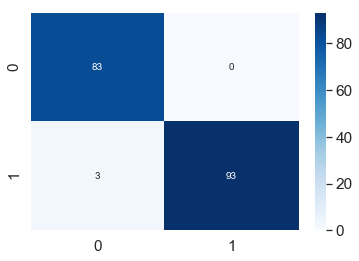

In [126]:
from sklearn.metrics import classification_report
sn.set(font_scale=1.4)
sn.heatmap(confusion, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues')
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))


# I shall now build logistic model


In [127]:
from sklearn.linear_model import LogisticRegression

param_grid={'penalty':['l1','l2'],'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_train,y_train)

k_ts=cross_val_score(grid_search, X_test, y_test, cv=kfold,scoring='f1').mean()

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\An

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\An

In [128]:
print("Train:",grid_search.best_score_)
print("Test",k_ts)
print("parameters",grid_search.best_params_)

Train: 0.9984553866585827
Test 0.9953488372093023
parameters {'C': 10, 'penalty': 'l1'}



## Writing to result2


In [129]:
result2.loc[len(result2)]=[grid_search.best_params_,'Logistic Regression',k_ts,grid_search.best_score_]


## Classification report and confusion matrix


In [130]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\An

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\An

              precision    recall  f1-score   support

   not fraud       0.99      1.00      0.99        83
       fraud       1.00      0.99      0.99        96

   micro avg       0.99      0.99      0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179



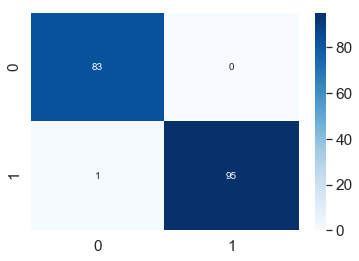

In [131]:
from sklearn.metrics import classification_report
sn.set(font_scale=1.4)
sn.heatmap(confusion, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues')
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))


# Now creating a SVC with polynomial kernel trick


In [132]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500],'degree':[1,2,3,4]}
grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=kfold, return_train_score=True,scoring='f1');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='f1').mean();

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

In [133]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 1.0
Test 0.9834834834834835
parameters {'C': 250, 'degree': 3}



## Writing to result2


In [134]:
result2.loc[len(result2)]=[grid_search.best_params_,'SVC-polynomial',test,grid_search.best_score_]


## Classification report and confusion matrix


In [135]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMe

              precision    recall  f1-score   support

   not fraud       0.99      1.00      0.99        83
       fraud       1.00      0.99      0.99        96

   micro avg       0.99      0.99      0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179



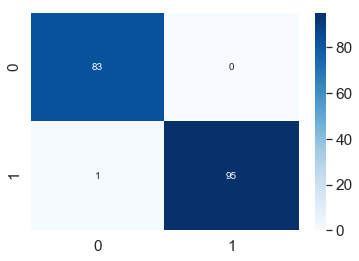

In [136]:
from sklearn.metrics import classification_report
sn.set(font_scale=1.4)
sn.heatmap(confusion, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues')
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))


# Creating SVC with rbf kernel


In [137]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500],'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=kfold, return_train_score=True, scoring='f1');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

In [138]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 1.0
Test 0.9945945945945945
parameters {'C': 10, 'gamma': 0.1}



## Writing to result2


In [139]:
result2.loc[len(result2)]=[grid_search.best_params_,'SVC rbf',test,grid_search.best_score_]


## Classification report and confusion matrix


In [140]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

              precision    recall  f1-score   support

   not fraud       0.99      1.00      0.99        83
       fraud       1.00      0.99      0.99        96

   micro avg       0.99      0.99      0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179



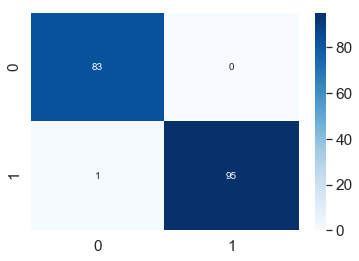

In [141]:
from sklearn.metrics import classification_report
sn.set(font_scale=1.4)
sn.heatmap(confusion, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues')
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))


# Creating an SVC with linear kernel


In [142]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=kfold, return_train_score=True,scoring='f1');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='f1').mean();

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

In [143]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9968866387337058
Test 0.9888888888888889
parameters {'C': 10}



## Writing to result2


In [144]:
result2.loc[len(result2)]=[grid_search.best_params_,'SVC linear',test,grid_search.best_score_]


## Classification report and confusion matrix


In [145]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

              precision    recall  f1-score   support

   not fraud       0.99      1.00      0.99        83
       fraud       1.00      0.99      0.99        96

   micro avg       0.99      0.99      0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179



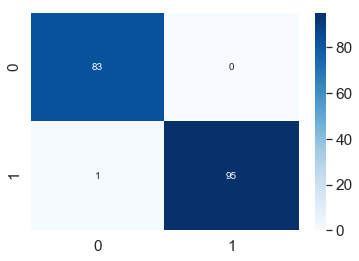

In [146]:
from sklearn.metrics import classification_report
sn.set(font_scale=1.4)
sn.heatmap(confusion, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues')
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))


# Now creating a LinearSVC model


In [147]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500]}
grid_search = GridSearchCV(LinearSVC(),param_grid, cv=kfold, return_train_score=True,scoring='f1');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='f1').mean();

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

In [148]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9936744406018149
Test 0.9834834834834835
parameters {'C': 250}



## Writing to result2


In [149]:
result2.loc[len(result2)]=[grid_search.best_params_,'Linear SVC',test,grid_search.best_score_]


## Classification report and confusion matrix


In [150]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


              precision    recall  f1-score   support

   not fraud       0.98      1.00      0.99        83
       fraud       1.00      0.98      0.99        96

   micro avg       0.99      0.99      0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179



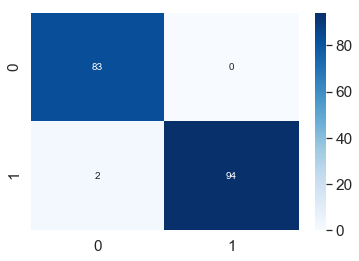

In [151]:
from sklearn.metrics import classification_report
sn.set(font_scale=1.4)
sn.heatmap(confusion, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues')
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))


# Create a decision Tree Classifier


In [152]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_train, y_train)
train=cross_val_score(tree, X_train, y_train, cv=kfold1,scoring='f1').mean()
test=cross_val_score(tree, X_test, y_test, cv=kfold1,scoring='f1').mean()
print("train",train)
print("test",test)

train 1.0
test 1.0



## Writing to result2


In [153]:
result2.loc[len(result2)]=[[],'Decision Tree',test,train]


## Classification report and confusion matrix


              precision    recall  f1-score   support

   not fraud       1.00      1.00      1.00        83
       fraud       1.00      1.00      1.00        96

   micro avg       1.00      1.00      1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



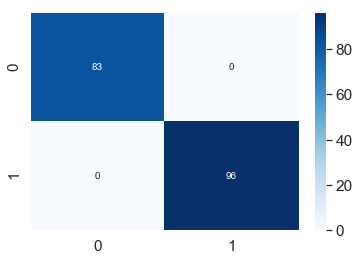

In [154]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(tree,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)
sn.set(font_scale=1.4)
sn.heatmap(confusion, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues')
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))

In [155]:
print(result2)

              Best_Parameters                Model  Test_score  Train_score
0          {'n_neighbors': 1}                  KNN    0.982016     0.996887
1  {'C': 10, 'penalty': 'l1'}  Logistic Regression    0.995349     0.998455
2     {'C': 250, 'degree': 3}       SVC-polynomial    0.983483     1.000000
3     {'C': 10, 'gamma': 0.1}              SVC rbf    0.994595     1.000000
4                   {'C': 10}           SVC linear    0.988889     0.996887
5                  {'C': 250}           Linear SVC    0.983483     0.993674
6                          []        Decision Tree    1.000000     1.000000



# Decision Tree is once again clearly the best model for predicting Risk_y



## For good measure, I'll write the models and scores to new csv files


In [156]:
result_reg.to_csv('regression_for_Audit_Risk.csv')
result1.to_csv('Classification_for_Risk_of_Audit_Risk_df.csv')
result2.to_csv('Classification_for_Risk_of_trial_df.csv')